In [1]:
import sys
sys.path.append('/userhome/pikachu/utils')
sys.path.append('/userhome/pikachu/third')
sys.path.append('/userhome/pikachu')
import os
os.environ['SM_FRAMEWORK'] = 'tf.keras'

In [2]:
sys.path.append('/userhome/pikachu/projects/ai/naic_seg')
import gezi
import melt
import melt as mt
from gezi import tqdm
import lele
import husky
import pandas as pd
import numpy as np
import tensorflow as tf
from absl import app, flags
FLAGS = flags.FLAGS
from gseg import config
from gseg.config import *
from gseg.dataset import Dataset
from gseg.evaluate import get_eval_fn
from gseg.util import get_infer_fn
from gseg.loss import get_loss_fn
from gseg.metrics import get_metrics
from gseg.model import get_model

In [3]:
argv = ['']
FLAGS(argv)
FLAGS.wandb = False
FLAGS.write_summary = True
FLAGS.write_metric_summary = True
FLAGS.drop_remainder = True 
FLAGS.cache_valid = False
FLAGS.do_test = False
FLAGS.batch_parse = False
FLAGS.static_input = True
FLAGS.tb_image = True
FLAGS.tb_image_interval = 1000000

In [4]:
def fit(dry_run=False):
  with strategy.scope():
    mt.fit(model, 
           loss_fn=model.get_loss() if hasattr(model, 'get_loss') else get_loss_fn(),
           Dataset=Dataset,
           metrics=get_metrics(),
           eval_fn=get_eval_fn(),
           inference_fn=get_infer_fn(),
           dry_run=dry_run
          )

In [5]:
FLAGS.fold = 1
GCS_ROOT = '/userhome/data'
FLAGS.train_input = f'{GCS_ROOT}/quarter/tfrecords/train/*/*'
FLAGS.train_exclude = f'{GCS_ROOT}/quarter/tfrecords/train/{FLAGS.fold}/'
FLAGS.valid_input = f'{GCS_ROOT}/quarter/tfrecords/train/{FLAGS.fold}/*'
ver = 19 #@param
tag = f'v{ver}' 
FLAGS.model_dir = f'/userhome/working/{tag}/base' 
FLAGS.fold = None
FLAGS.clear_first =  False#@param
FLAGS.mode = 'train'
FLAGS.vie = 5
FLAGS.save_interval_epochs = 1
FLAGS.optimizer = 'bert-adamw'
FLAGS.learning_rate = 1e-3
FLAGS.min_learning_rate = 1e-5
FLAGS.learning_rate_decay_power = 0.5

FLAGS.model = 'sm.Unet' #@param
FLAGS.backbone = 'EfficientNetB4' #@param
image_size = 256 #@param
FLAGS.image_size = [image_size, image_size]
FLAGS.epochs = 100 #@param
FLAGS.batch_size = 64 #@param
FLAGS.gpus = 4
FLAGS.fp16 = True

# FLAGS.load_weights_only = True
# FLAGS.mode = 'valid'
# FLAGS.fp16 = False
# FLAGS.gpus = 1

model_name = FLAGS.model.split('.')[-1]
FLAGS.mn = f'{model_name}.{FLAGS.backbone}.s{image_size}'

FLAGS.image_sizes = [192, 224, 256, 288, 320]
image_sizes = ','.join(map(str, FLAGS.image_sizes))
FLAGS.mn += f'.s{image_sizes}'

# FLAGS.image_sizes = []
# image_size = 256 #@param
# FLAGS.image_size = [image_size, image_size]
# FLAGS.dynamic_image_size = True

In [6]:
config.init()
mt.init()
strategy = mt.distributed.get_strategy()
with strategy.scope():
  model = get_model(FLAGS.model)

2020-12-13 00:06:15 0:00:00 fcntl.floc with lock_file /root/.melt.lock (If hang here means other programs calling melt.init have not finished yet)
2020-12-13 00:06:16 0:00:01 Tf dataset and Tf model train in Eager mode, keras True, distributed:False
2020-12-13 00:06:16 0:00:01 log_level: 20 (try --debug to show more or --log_level=(> 20) to show less(no INFO), try --verbose to show train/valid loss intervaly)
2020-12-13 00:06:16 0:00:01 batch_size: 256 eval_batch_size: 256 batch_size_per_gpu: 64 num_gpus: 4 gpu: [0, 1, 2, 3] CUDA_VISIABLE_DEVICES=[] work_mode: train distributed: False horovod: False
2020-12-13 00:06:23 0:00:08 model: [Unet.EfficientNetB4.s256.s192,224,256,288,320] model_dir: [/userhome/working/v19/Unet.EfficientNetB4.s256.s192,224,256,288,320]
2020-12-13 00:06:23 0:00:08 Train precision: mixed_float16
2020-12-13 00:06:23 0:00:08 ori_image_size: [256, 256] image_size: [256, 256]


Segmentation Models: using `tf.keras` framework.
71680000/71678424 [==============================] - 9s 0us/step
Segmentation Models: using `tf.keras` framework.


2020-12-13 00:06:49 0:00:34 model: <tensorflow.python.keras.engine.functional.Functional object at 0x7ff61acaf9e8> backbone: EfficientNetB4
2020-12-13 00:06:49 0:00:34 using preprocess of sm for EfficientNetB0 efficientnetb0
2020-12-13 00:06:49 0:00:34 preprocess: <function preprocess_input at 0x7ff61ab58400>


2020-12-13 00:06:49 0:00:34 Round: 0 mode: train train_input:[*] valid_input:[*] train_dirs:[1] valid_dir: /userhome/data/quarter/tfrecords/train/1/* do_valid: True do_test: False


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


2020-12-13 00:07:06 0:00:51 WARNING: model2tb for model model fail
2020-12-13 00:07:06 0:00:51 WARNING: Image data of dtype object cannot be converted to float
2020-12-13 00:07:06 0:00:51 Model: "model"
2020-12-13 00:07:06 0:00:51 _________________________________________________________________
2020-12-13 00:07:06 0:00:51 Layer (type)                 Output Shape              Param #   
2020-12-13 00:07:06 0:00:51 =================================================================
2020-12-13 00:07:06 0:00:51 sm-unet-efficientnetb4 (Func [(None, 256, 256, 15), (N 29252951  
2020-12-13 00:07:06 0:00:51 =================================================================
2020-12-13 00:07:06 0:00:51 Total params: 29,252,951
2020-12-13 00:07:06 0:00:51 Trainable params: 29,125,767
2020-12-13 00:07:06 0:00:51 Non-trainable params: 127,184
2020-12-13 00:07:06 0:00:51 _________________________________________________________________


2020-12-13 00:07:27 0:01:12 num_train_examples: 90000 num_steps_per_epoch: 352


2020-12-13 00:07:27 0:01:12 num_valid_examples: 10000 num_valid_steps_per_epoch: 40
2020-12-13 00:07:27 0:01:12 round: 0 loss_fn: <function Model.loss_wrapper.<locals>.loss_fn at 0x7ff61ab589d8>
2020-12-13 00:07:27 0:01:12 optimizer: <husky.optimization.AdamWeightDecay object at 0x7ff5df1e19b0> lr: <husky.optimization.WarmUp object at 0x7ff5df1e1ac8> init_lr: 0.001
2020-12-13 00:07:27 0:01:12 total_steps: 35200 warmup_steps: 3520 end_lr: 1e-05
2020-12-13 00:07:28 0:01:12 before loading, total params: 29252951, l2:0.009015
2020-12-13 00:07:28 0:01:12 latest ckpt to restore: [None] from /userhome/working/v19/Unet.EfficientNetB4.s256.s192,224,256,288,320
2020-12-13 00:07:28 0:01:12 load_weights: [/userhome/working/v19/Unet.EfficientNetB4.s256.s192,224,256,288,320/model.h5]
2020-12-13 00:07:29 0:01:14 after loading, total params: 29252951, l2:0.012360, l2_diff:0.003345


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: name 'retval_' is nonlocal and global (tmpvkm99m2t.py, line 19)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
40/40 [==============================] - 8s 189ms/step - loss: 0.3988 - FWIoU: 0.7648 - MIoU: 0.7234 - ACC/pixel: 0.8643 - ACC/class: 0.8157



2020-12-13 03:41:07 3:34:52 ALL DONE! You may check log file: [tail /userhome/working/v19/Unet.EfficientNetB4.s256.s192,224,256,288,320/log.html*]


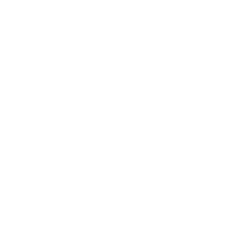

In [7]:
fit()

In [8]:
FLAGS.mode = 'valid'
FLAGS.custom_eval = False
FLAGS.tta = False
fit()
# mt.save_model(model, f'{FLAGS.model_dir}/model.h5')

2020-12-13 03:41:07 3:34:52 Round: 1 mode: valid train_input:[*] valid_input:[*] train_dirs:[1] valid_dir: /userhome/data/quarter/tfrecords/train/1/* do_valid: True do_test: False


2020-12-13 03:41:34 3:35:19 num_train_examples: 90000 num_steps_per_epoch: 352


2020-12-13 03:41:34 3:35:19 num_valid_examples: 10000 num_valid_steps_per_epoch: 40


2020-12-13 03:41:34 3:35:19 round: 1 loss_fn: <function Model.loss_wrapper.<locals>.loss_fn at 0x7ff5df08f510>
2020-12-13 03:41:34 3:35:19 optimizer: <husky.optimization.AdamWeightDecay object at 0x7ff5df1e19b0> lr: 0.001 init_lr: 0.001
2020-12-13 03:41:34 3:35:19 total_steps: 35200 warmup_steps: 3520 end_lr: 1e-05


ValueError: Called Trackable._track_trackable() with name='base_optimizer', but a Trackable with this name is already declared as a dependency. Names must be unique (or overwrite=True).

In [ ]:
FLAGS.mode = 'valid'
FLAGS.custom_eval = False
FLAGS.tta = True
fit()
# mt.save_model(model, f'{FLAGS.model_dir}/model.h5')

In [ ]:
df = gezi.gen_metric_df(FLAGS.model_dir)

In [ ]:
gezi.line(df, ['FWIoU'])